In [1]:
import sys
import os
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

from swarmai.challenges.python_challenges.PythonChallenge import PythonChallenge

# autoreload
%load_ext autoreload
%autoreload 2

# 1. Setup

In [2]:
# Load API keys
keys_file = Path("../keys.json")
with open(keys_file) as f:
    keys = json.load(f)
os.environ["OPENAI_API_KEY"] = keys["OPENAI_API_KEY"]

In [3]:
# defining the challenge the swarm will be working on
test_challenge_config = Path('../swarmai/challenges/python_challenges/challenge2/pc2_config.yaml')
challenge1 = PythonChallenge(test_challenge_config)
print(challenge1.get_problem())

A password is considered strong if the below conditions are all met:
- It has at least 6 characters and at most 20 characters.
- It contains at least one lowercase letter, at least one uppercase letter, and at least one digit.
- It does not contain three repeating characters in a row (i.e., "Baaabb0" is weak, but "Baaba0" is strong).

Given a string password, return the minimum number of steps required to make password strong. if password is already strong, return 0.

In one step, you can:
- Insert one character to password,
- Delete one character from password, or
- Replace one character of password with another character.
 

Example 1:
Input: password = "a"
Output: 5

Example 2:
Input: password = "aA1"
Output: 3

Example 3:
Input: password = "1337C0d3"
Output: 0
 

Constraints:
1 <= password.length <= 50
password consists of letters, digits, dot '.' or exclamation mark '!'.

Include only the following function in your answer enclosed in a code block.
```python
def strongPasswordCheck

# 2. Solving with vanilla GPT

In [10]:
from gptswarm.utils.GPTAgent import GPTAgent

In [11]:
model_name = "gpt-3.5-turbo"
default_agent_parameters = {
    "model_name": f"openai/{model_name}",
    "model_params" : {
        "model_name": model_name,
        "temperature": 0.5,
        "max_tokens": 1000
        }
    }

agent = GPTAgent(default_agent_parameters)

OpenAI connection successful! Model: gpt-3.5-turbo


In [12]:
conversation = [
    {"role": "system", "content": "Act as a professional python developer with a lot of experience solving leetcode problems in the most efficient (memory and runtime) and elegant way."},
    {"role": "user", "content": challenge1.get_problem()}
]
result = agent.call_model(conversation)
print(result)

One possible solution to this problem is as follows:

We can start by counting the number of missing types of characters (lowercase, uppercase, and digit). Then, we can check if the password length is less than 6. If it is, we can add the missing types of characters and/or additional characters to make the password strong. If the password length is between 6 and 20, we can check if it contains repeating characters. If it does, we can try to replace them with other characters or delete them. If the password length is greater than 20, we can try to delete some characters to make it shorter and then apply the same strategy as before to remove repeating characters.

Here's the implementation of the above algorithm:

```python
def strongPasswordChecker(s: str) -> int:
    missing_types = 3
    if any(c.islower() for c in s):
        missing_types -= 1
    if any(c.isupper() for c in s):
        missing_types -= 1
    if any(c.isdigit() for c in s):
        missing_types -= 1
        
    if

In [14]:
score, evaluation = challenge1.evaluate_solution(result)
print(score)
print(evaluation)

0.4283567134268537
Total score: 0.428; 42.84% test cases are solved correctly; 
 Runtime: 6.116ms, which is 0.660 times slower than the ideal solution.
 Some test cases are solved incorrectly. Examples: 
Input: aaa111
Result: -12
Expected: 2
Correct: False
Input: bbaaaaaaaaaaaaaaacccccc
Result: None
Expected: 8
Correct: False
Input: A1234567890aaabbbbccccc
Result: None
Expected: 4
Correct: False
Input: aaaabbbbccccddeeddeeddeedd
Result: None
Expected: 8
Correct: False
Input: FFFFFFFFFFFFFFF11111111111111111111AAA
Result: None
Expected: 23
Correct: False



# 3. Testing the swarm

In [4]:
from swarmai.Swarm import Swarm

In [5]:
# establishing the swarm
swarm1 = Swarm(challenge1, (5, 5), {"python developer": 1})
print(swarm1.agents_coords)
print(swarm1.agents_ids)

2023-04-11 02:17:10,992 - SwarmLogger - INFO - Created 25 agents with roles: ['python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer' 'python developer' 'python developer'
 'python developer']
2023-04-11 02:17:10,993 - SwarmLogger - INFO - Agents roles:
[['p' 'p' 'p' 'p' 'p']
 ['p' 'p' 'p' 'p' 'p']
 ['p' 'p' 'p' 'p' 'p']
 ['p' 'p' 'p' 'p' 'p']
 ['p' 'p' 'p' 'p' 'p']]


[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [6]:
swarm1.run_swarm(20)

2023-04-11 02:17:11,664 - SwarmLogger - INFO - Cycle 0
2023-04-11 02:17:11,665 - SwarmLogger - INFO - Agent 21 is performing the task
2023-04-11 02:17:11,668 - SwarmLogger - INFO - Agent 3 is performing the task
2023-04-11 02:17:11,669 - SwarmLogger - INFO - Agent 11 is performing the task
2023-04-11 02:17:11,670 - SwarmLogger - INFO - Agent 18 is performing the task
2023-04-11 02:17:11,673 - SwarmLogger - INFO - Agent 9 is performing the task
2023-04-11 02:17:11,673 - SwarmLogger - INFO - Agent 13 is performing the task
2023-04-11 02:17:11,674 - SwarmLogger - INFO - Agent 4 is performing the task
2023-04-11 02:17:11,678 - SwarmLogger - INFO - Agent 12 is performing the task
2023-04-11 02:17:11,679 - SwarmLogger - INFO - Agent 2 is performing the task
2023-04-11 02:17:11,684 - SwarmLogger - INFO - Agent 7 is performing the task
2023-04-11 02:17:11,685 - SwarmLogger - INFO - Agent 15 is performing the task
2023-04-11 02:17:11,686 - SwarmLogger - INFO - Agent 0 is performing the task
202

In [7]:
print(swarm1.shared_memory['best_answer']['content'])

Here's the implementation of the `strongPasswordChecker` function that meets the requirements mentioned in the prompt:

```python
def strongPasswordChecker(s: str) -> int:
    n = len(s)
    missing_types = 3
    if any('a' <= c <= 'z' for c in s):
        missing_types -= 1
    if any('A' <= c <= 'Z' for c in s):
        missing_types -= 1
    if any(c.isdigit() for c in s):
        missing_types -= 1

    changes = 0
    ones = twos = 0
    i = 2
    while i < n:
        if s[i] == s[i-1] == s[i-2]:
            length = 2
            while i < n and s[i] == s[i-1]:
                length += 1
                i += 1

            changes += length // 3
            if length % 3 == 0:
                ones += 1
            elif length % 3 == 1:
                twos += 1
        else:
            i += 1

    if n < 6:
        return max(missing_types, 6 - n)
    elif n <= 20:
        return max(missing_types, changes)
    else:
        delete = n - 20
        changes -= min(delete, ones *

In [8]:
step = 1
value_tensor = swarm1.history[step]["value_tensor"]
best_score = swarm1.history[step]["best_score"]

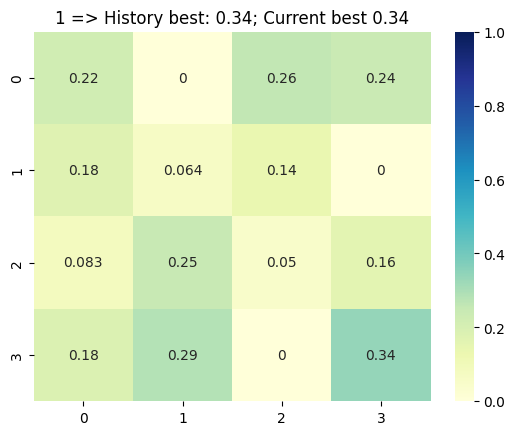

In [9]:
# use seaborn to plot the heatmap including the values in each cell and a colorbar
# the value limit is between 0 and 1
sns.heatmap(value_tensor, annot=True, cbar=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title(f"{step} => History best: {best_score:.2f}; Current best {np.max(value_tensor):.2f}")
plt.show()

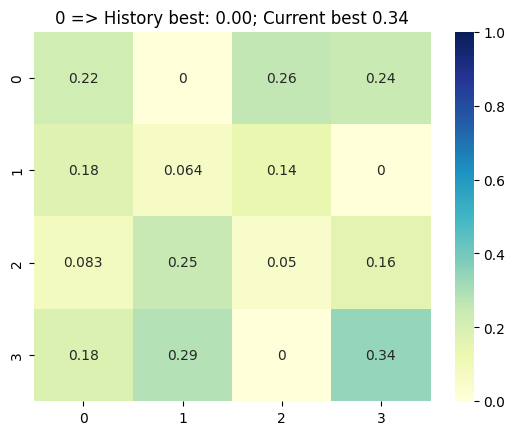

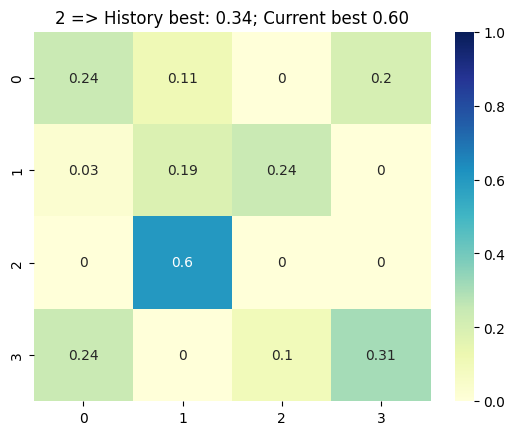

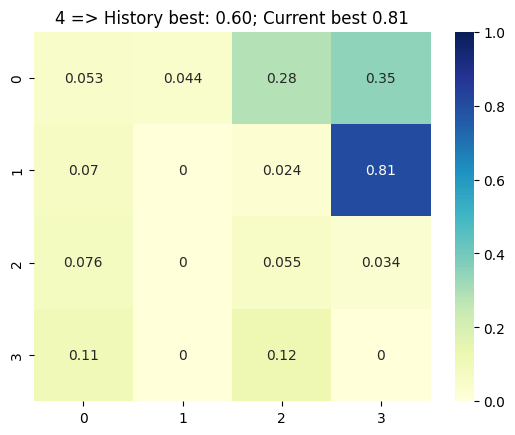

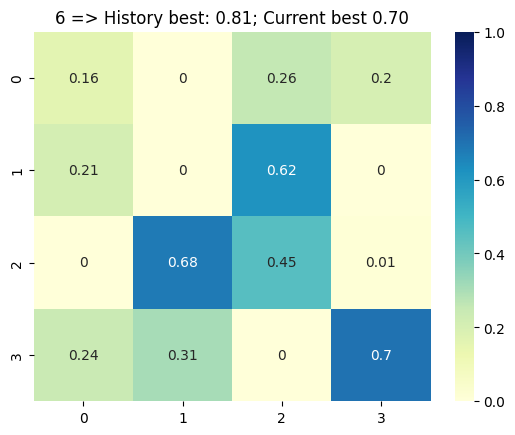

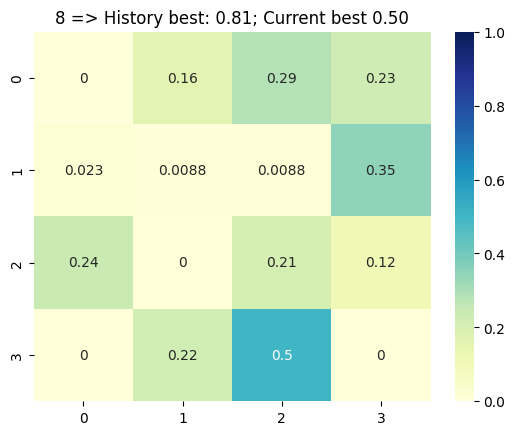

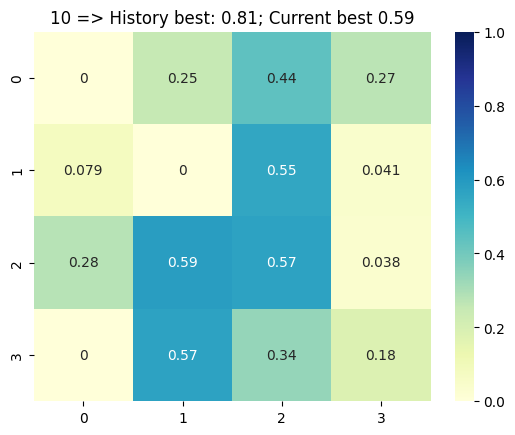

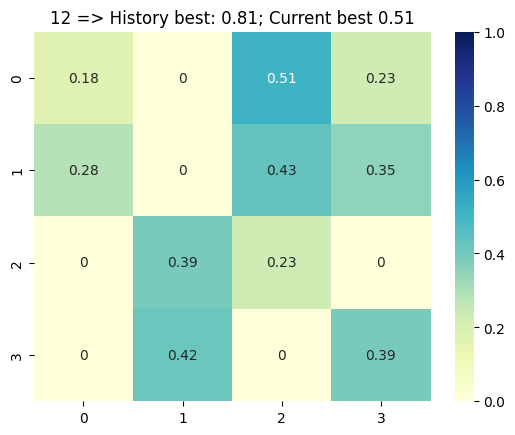

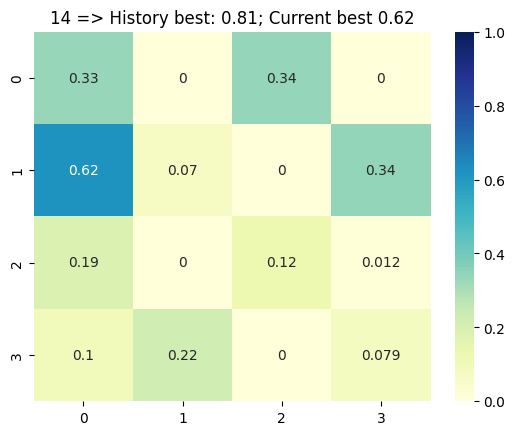

In [10]:
for i in range(len(swarm1.history))[::2]:
    step = i
    value_tensor = swarm1.history[step]["value_tensor"]
    best_score = swarm1.history[step]["best_score"]
    sns.heatmap(value_tensor, annot=True, cbar=True, cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(f"{step} => History best: {best_score:.2f}; Current best {np.max(value_tensor):.2f}")
    plt.show()